# Descriptive and Exploratory Analytics

**Data**: Some house price data from Kaggle

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
pd.set_option('display.max_columns', 20)

In [12]:
import matplotlib
matplotlib.__version__

'3.3.4'

## Data import

In [13]:
df = pd.read_csv('data/house prices/train.csv') #hier immer im Ordner ordentlich den Pfad angeben
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Summary EAD 
(Exploratory data analysis)

In [14]:
# Some first descriptives
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## SalePrice


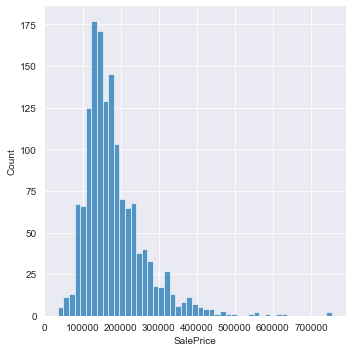

In [20]:
# Analysis of the dependent variable
sns.displot(df['SalePrice'])
plt.savefig('figures/linreg_saleprice_col.pdf')
plt.show()

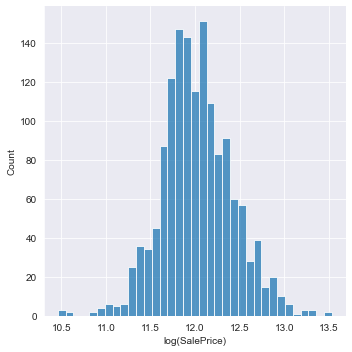

In [16]:
sns.displot(np.log(df['SalePrice']))
plt.xlabel('log(SalePrice)')
plt.savefig('figures/linreg_logsaleprice_col.pdf')
plt.show()

### Other variables

In [21]:
# First impression
print(df.corr()['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

**Highly correlated variables**

- `OverallQual`
 - 10: Very Excellent
 - 9: Excellent
 - 8: Very Good
 - 7: Good
 - 6: Above Average
 - 5: Average
 - 4: Below Average
 - 3: Fair
 - 2: Poor
 - 1: Very Poor
- `GrLivArea`: Above grade (ground) living area square feet
- `GarageArea`: Size of garage in square feet

In [22]:
df1 = df[['OverallQual', 'SalePrice','GrLivArea','GarageArea']]

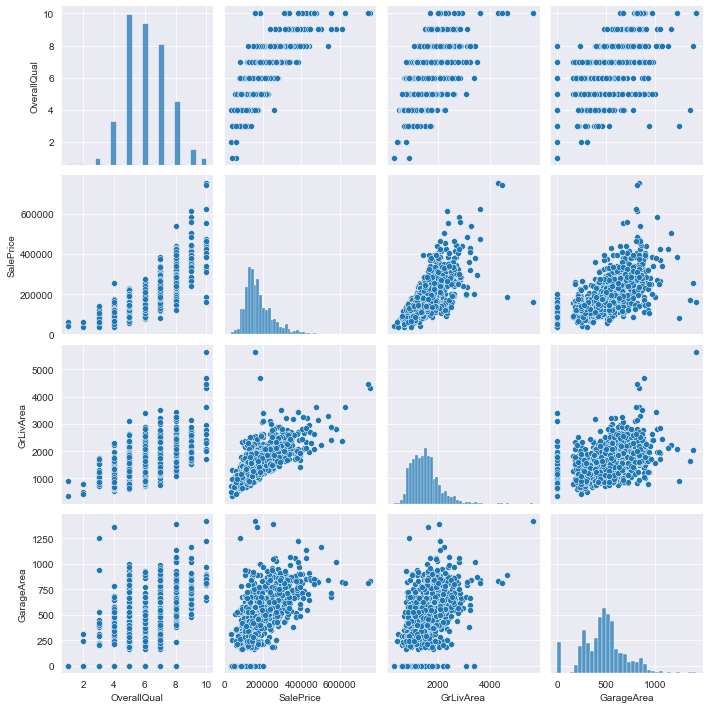

In [23]:
sns.pairplot(df1)
#plt.tight_layout()
plt.savefig('figures/linreg_pairplot_col.pdf')

plt.show()

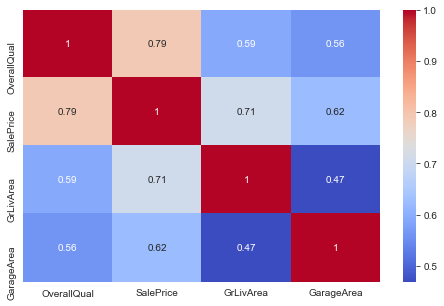

In [24]:
plt.figure(figsize = (8,5))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
# plt.savefig('figures/linreg_heatmap.pdf')
plt.show()

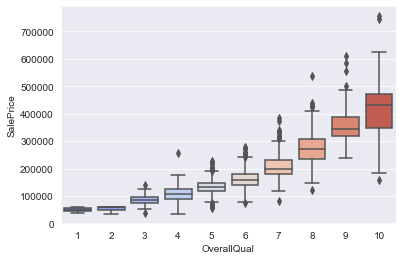

In [25]:
sns.boxplot(x=df1['OverallQual'], y=df1['SalePrice'], palette='coolwarm')
# plt.savefig('figures/linreg_boxplot1.pdf')
plt.show()

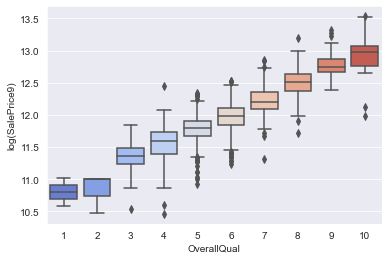

In [26]:
sns.boxplot(x=df1['OverallQual'], y=np.log(df1['SalePrice']), palette='coolwarm')
plt.ylabel('log(SalePrice9)')
# plt.savefig('figures/linreg_boxplot2.pdf')
plt.show()

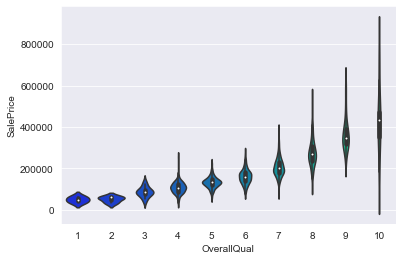

In [27]:
sns.violinplot(x=df1['OverallQual'], y=df1['SalePrice'], palette='winter')
plt.xlabel('OverallQual')
# plt.savefig('figures/linreg_boxplot3pdf')
plt.show()

C:\Users\Nyamkhand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nyamkhand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nyamkhand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nyamkhand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nyamkhand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

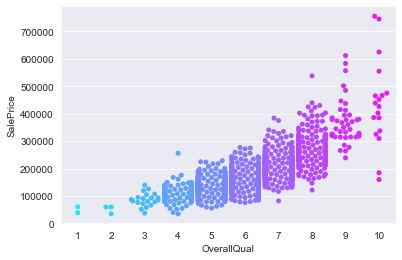

In [28]:
sns.swarmplot(x=df1['OverallQual'], y=df1['SalePrice'], palette='cool')
plt.xlabel('OverallQual')
# plt.savefig('figures/linreg_boxplot3pdf')
plt.show()

# Simple Linear Regression

## `statsmodels`

In [29]:
import statsmodels.api as sm

In [31]:
#paket statsmodels generiert umfassenden statistischen output 
#-> klassische statistische Herangehensweise:
#   Verfolgt also ein statistisches Model, bei dem ausgegangen wird, dass die Daten,
#   die zur Verfügung stehen Zufalssstichproben einer größeren Grundgesamtheit sind
#   Aufgrund dieser Daten werden Parameter der Grundgesamtheit geschätzt und Prognosen erstellt 
#   HIer: Modellierung des Verkaufspreises über die Wohnheimgröße
y=df1['SalePrice'] #abhängige Variable Verkaufspreis
x=df1['GrLivArea'] #erklärende Variable Wohnheimgröße
model_sm = sm.OLS(y, sm.add_constant(x)) #beta0
model_sm = model_sm.fit() #fitten/schätzung des models
#R² für Güte-Anpassung, je höher das R² desto besser ist das Model an die Daten angepasst

In [32]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 19 May 2021   Prob (F-statistic):          4.52e-223
Time:                        19:25:35   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

## `sklearn`

In [35]:
#paket scikit learning generiert hingegen wenig statistische Kennzahlen 
#-> Verfolgt machine learning Herangehensweise:
#   Verknüpfung von x und y über ein Model
#   Alles was nicht im Model zu sehen ist, ist nur Noise (Rauschen) z.B. Zufallsfehler
#   Fitten des unterstellten Zusammenhangs(linearer Zusammenhang) zwischen den Inputs & Outputs (x & y)
#   über eine Verlustfunktion(Minimierung eines Kriteriums z.B. kleinst-quadrate-Prinzip (OLS))
#   -Teilweise auch zusätzliche Hyper-Parameter, die nicht direkt über die Daten gefittet werden, sondern
#   vorab vorspezifiziert werden müssen. 
#   -Keine Annahme einer Zufallsstichprobe, sondern Aufteilung in Trainings- und Testdatensätze
#   -Ziel im Machine-Learning ist nur die Prognose von neuen zukünftigen Datenpunkten
#   -Anhand des Trainingsdatensatz wird das Model gefittet(trainiert)
#   -Anhand des Testdatensatzes wird die Güte des Models beurteilt
#machine learning fitting 
from sklearn.linear_model import LinearRegression #importieren von linearer regression 

In [36]:
model_sk = LinearRegression() #model als methode definieren

In [37]:
model_sk.fit(sm.add_constant(x), y)  #fitten des modells zusätzlich einer konstanten
                                    

LinearRegression()

In [38]:
print(model_sk.intercept_)     #output achsenabschnitt und steigungskoeffizient
print(model_sk.coef_)

18569.02585648725
[  0.         107.13035897]


## Prediction 

In [39]:
#Prognose des Vekaufspreises für jede Wohnheimsgröße
pred_sm = model_sm.predict(sm.add_constant(x)) #predict unter Verwendung der Wohnheimsgrößen (x-Variable)

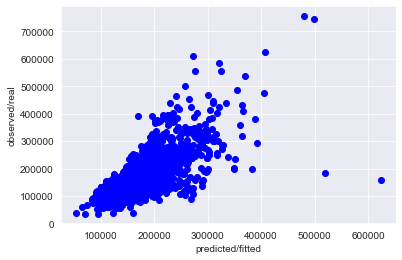

In [40]:
#sogenanntes real/fit diagramm 
plt.scatter(pred_sm, y, color='blue')
plt.xlabel('predicted/fitted')
plt.ylabel('observed/real')
plt.show()
#je stärker die Abweichung der Diagonalen, desto schlechter die Güte des Modells 